In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the preprocessed data
df = pd.read_csv('EDA - LR.csv',index_col=0)

In [3]:
df.head()

,time,temperature,humidity,pressure,windSpeed,cloudCover,visibility,ozone,east_wind,south_wind,west_wind,PM2
0,2019-01-01 23:00:00,3.20,0.80,NaN,9.3,0.75,10.003,314.2,0,0,1,12.9
1,2019-01-02 00:00:00,2.20,0.85,NaN,8.8,0.75,10.003,315.5,0,0,1,5.5
2,2019-01-02 01:00:00,2.20,0.79,NaN,7.2,0.75,10.003,315.7,0,0,1,4.7
3,2019-01-02 02:00:00,1.20,0.92,NaN,7.2,0.75,2.003,316.5,0,0,1,5.7
4,2019-01-02 03:00:00,0.22,0.99,NaN,7.2,0.75,1.498,318.5,0,0,1,6.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 16894
Data columns (total 12 columns):
time           16895 non-null object
temperature    16895 non-null float64
humidity       16895 non-null float64
pressure       14084 non-null float64
windSpeed      16724 non-null float64
cloudCover     15890 non-null float64
visibility     16865 non-null float64
ozone          16895 non-null float64
east_wind      16895 non-null int64
south_wind     16895 non-null int64
west_wind      16895 non-null int64
PM2            16895 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 1.7+ MB


In [5]:
# remove outliers for the data set
# checkpoint
df_no_outl = df[df['PM2']<=150]

In [6]:
# drop rows with unknown values
df_dropna = df_no_outl.dropna().reset_index()

In [7]:
# drop columns with unknown values
df_drop_col = df_no_outl.drop(['pressure','cloudCover'], axis=1)

In [8]:
# convert dates to datetime format
df_dropna['time'] = pd.to_datetime(df_dropna['time'],format = '%Y-%m-%d %H:%M:%S')

In [9]:
# create new feature month
df_dropna['month'] = df_dropna['time'].apply(lambda time: time.month)

In [10]:
# create new feature hour
df_dropna['hour'] = df_dropna['time'].apply(lambda time: time.hour)

In [11]:
# create new feature weekday
df_dropna['weekday'] = df_dropna['time'].apply(lambda time: time.weekday())

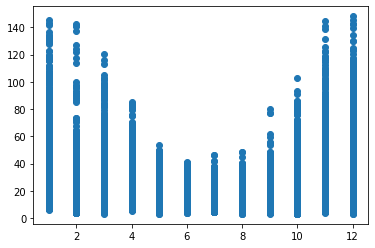

In [12]:
plt.scatter(df_dropna['month'],df_dropna['PM2']);

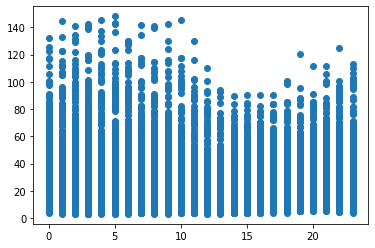

In [13]:
plt.scatter(df_dropna['hour'],df_dropna['PM2']);

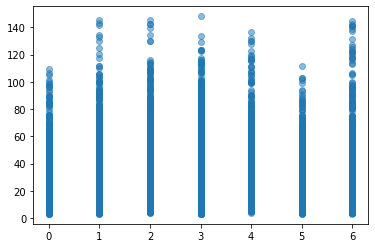

In [14]:
plt.scatter(df_dropna['weekday'],df_dropna['PM2'],alpha = 0.5);

In [15]:
# create checkpoint
df_time = df_dropna.copy()

In [16]:
# create dummy variables from month (by seasons), hour (by part of the day), and weekday (weekend or not)
def month_map(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    else:
        return 'fall'

def hour_map(hour):
    if hour in range(0,7):
        return 'night'
    elif hour in range(7,13):
        return 'morning'
    elif hour in range(13,19):
        return 'afternoon'
    else:
        return 'evening'
    
def weekday_map(weekday):
    if weekday in range(0,5):
        return 'workday'
    else:
        return 'weekend'
    
df_time['month'] = df_time['month'].apply(month_map)
df_time['hour'] = df_time['hour'].apply(hour_map)
df_time['weekday'] = df_time['weekday'].apply(weekday_map)

In [17]:
df_time.head()

,index,time,temperature,humidity,pressure,windSpeed,cloudCover,visibility,ozone,east_wind,south_wind,west_wind,PM2,month,hour,weekday
0,2811,2019-05-01 20:00:00,11.82,0.70,1007.1,3.94,0.56,14.470,392.8,0,0,1,16.2,spring,evening,workday
1,2812,2019-05-01 21:00:00,11.34,0.82,1007.3,4.19,0.75,11.226,390.9,0,0,1,18.8,spring,evening,workday
2,2813,2019-05-01 22:00:00,11.07,0.87,1007.1,4.34,0.80,11.814,389.6,0,0,1,22.6,spring,evening,workday
3,2814,2019-05-01 23:00:00,10.98,0.89,1006.8,4.63,0.80,14.340,388.6,0,0,1,16.2,spring,evening,workday
4,2815,2019-05-02 00:00:00,10.85,0.92,1006.3,4.34,0.76,16.093,389.1,0,0,1,18.5,spring,night,workday


In [18]:
# create checkpoint
df_time_dummies = df_time.copy()

In [19]:
season_columns = pd.get_dummies(df_time_dummies['month'], drop_first = True)
daypart_columns = pd.get_dummies(df_time_dummies['hour'], drop_first = True)
weekend_columns = pd.get_dummies(df_time_dummies['weekday'], drop_first = True)

In [20]:
# concatenate column values
# create checkpoint
df_dummies = pd.concat([df_time_dummies,season_columns,daypart_columns,weekend_columns], axis = 1)

In [21]:
df_dummies.head()

,index,time,temperature,humidity,pressure,windSpeed,cloudCover,visibility,ozone,east_wind,...,month,hour,weekday,spring,summer,winter,evening,morning,night,workday
0,2811,2019-05-01 20:00:00,11.82,0.70,1007.1,3.94,0.56,14.470,392.8,0,...,spring,evening,workday,1,0,0,1,0,0,1
1,2812,2019-05-01 21:00:00,11.34,0.82,1007.3,4.19,0.75,11.226,390.9,0,...,spring,evening,workday,1,0,0,1,0,0,1
2,2813,2019-05-01 22:00:00,11.07,0.87,1007.1,4.34,0.80,11.814,389.6,0,...,spring,evening,workday,1,0,0,1,0,0,1
3,2814,2019-05-01 23:00:00,10.98,0.89,1006.8,4.63,0.80,14.340,388.6,0,...,spring,evening,workday,1,0,0,1,0,0,1
4,2815,2019-05-02 00:00:00,10.85,0.92,1006.3,4.34,0.76,16.093,389.1,0,...,spring,night,workday,1,0,0,0,0,1,1


In [22]:
# drop time, month, hour, weekday columns
# checkpoint
df_prep = df_dummies.drop(['time','month','hour','weekday'], axis = 1)

In [23]:
df_prep.columns.values

array(['index', 'temperature', 'humidity', 'pressure', 'windSpeed',
       'cloudCover', 'visibility', 'ozone', 'east_wind', 'south_wind',
       'west_wind', 'PM2', 'spring', 'summer', 'winter', 'evening',
       'morning', 'night', 'workday'], dtype=object)

In [24]:
df_prep = df_prep[['temperature', 'humidity', 'pressure', 'windSpeed', 'cloudCover',
       'visibility', 'ozone', 'east_wind', 'south_wind', 'west_wind', 'spring', 'summer', 'winter', 'evening', 'morning', 'night',
       'workday','PM2']]

In [25]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14070 entries, 0 to 14069
Data columns (total 18 columns):
temperature    14070 non-null float64
humidity       14070 non-null float64
pressure       14070 non-null float64
windSpeed      14070 non-null float64
cloudCover     14070 non-null float64
visibility     14070 non-null float64
ozone          14070 non-null float64
east_wind      14070 non-null int64
south_wind     14070 non-null int64
west_wind      14070 non-null int64
spring         14070 non-null uint8
summer         14070 non-null uint8
winter         14070 non-null uint8
evening        14070 non-null uint8
morning        14070 non-null uint8
night          14070 non-null uint8
workday        14070 non-null uint8
PM2            14070 non-null float64
dtypes: float64(8), int64(3), uint8(7)
memory usage: 1.3 MB


In [26]:
unscaled_inputs = df_prep.iloc[:,:-1]

In [27]:
unscaled_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14070 entries, 0 to 14069
Data columns (total 17 columns):
temperature    14070 non-null float64
humidity       14070 non-null float64
pressure       14070 non-null float64
windSpeed      14070 non-null float64
cloudCover     14070 non-null float64
visibility     14070 non-null float64
ozone          14070 non-null float64
east_wind      14070 non-null int64
south_wind     14070 non-null int64
west_wind      14070 non-null int64
spring         14070 non-null uint8
summer         14070 non-null uint8
winter         14070 non-null uint8
evening        14070 non-null uint8
morning        14070 non-null uint8
night          14070 non-null uint8
workday        14070 non-null uint8
dtypes: float64(7), int64(3), uint8(7)
memory usage: 1.2 MB


In [28]:
columns_to_omit = ['east_wind', 'south_wind', 'west_wind', 'spring', 'summer', 'winter', 'evening', 'morning', 'night',
       'workday']

In [29]:
columns_to_scale = [column for column in unscaled_inputs.columns.values if column not in columns_to_omit]
columns_to_scale

['temperature',
 'humidity',
 'pressure',
 'windSpeed',
 'cloudCover',
 'visibility',
 'ozone']

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self,columns,copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y = None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        
    def transform(self, X, y = None, copy = None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns = self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled,X_scaled], axis = 1)[init_col_order]

In [31]:
smog_scaler = CustomScaler(columns_to_scale)

In [32]:
smog_scaler.columns

['temperature',
 'humidity',
 'pressure',
 'windSpeed',
 'cloudCover',
 'visibility',
 'ozone']

In [33]:
smog_scaler.fit(unscaled_inputs)

In [34]:
scaled_inputs = smog_scaler.transform(unscaled_inputs)

In [35]:
scaled_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14070 entries, 0 to 14069
Data columns (total 17 columns):
temperature    14070 non-null float64
humidity       14070 non-null float64
pressure       14070 non-null float64
windSpeed      14070 non-null float64
cloudCover     14070 non-null float64
visibility     14070 non-null float64
ozone          14070 non-null float64
east_wind      14070 non-null int64
south_wind     14070 non-null int64
west_wind      14070 non-null int64
spring         14070 non-null uint8
summer         14070 non-null uint8
winter         14070 non-null uint8
evening        14070 non-null uint8
morning        14070 non-null uint8
night          14070 non-null uint8
workday        14070 non-null uint8
dtypes: float64(7), int64(3), uint8(7)
memory usage: 1.2 MB


In [36]:
scaled_inputs.shape

(14070, 17)

In [37]:
targets = df_prep['PM2']

In [38]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=101)

In [40]:
print(X_train.shape, y_train.shape)

(11256, 17) (11256,)


In [41]:
# Linear regression with sklearn

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
reg = LinearRegression()

In [44]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
reg.score(X_train,y_train)

0.4442664317266086

In [46]:
# create summary table with all coefficients and intercept
feature_name = unscaled_inputs.columns.values

In [47]:
summary_table = pd.DataFrame(columns = ['Feature name'],data = feature_name)

In [48]:
summary_table['Coefficient'] = np.transpose(reg.coef_)

In [49]:
summary_table

,Feature name,Coefficient
0,temperature,-8.991854
1,humidity,-0.228370
2,pressure,0.745167
3,windSpeed,-4.894919
4,cloudCover,-0.793075
5,visibility,0.810461
6,ozone,-5.263339
7,east_wind,6.383307
8,south_wind,6.544788
9,west_wind,6.746555


In [50]:
summary_table.index = summary_table.index + 1 

In [51]:
summary_table.loc[0] = ['Intercept',reg.intercept_]

In [52]:
summary_table = summary_table.sort_index()

In [53]:
summary_table

,Feature name,Coefficient
0,Intercept,10.059043
1,temperature,-8.991854
2,humidity,-0.228370
3,pressure,0.745167
4,windSpeed,-4.894919
5,cloudCover,-0.793075
6,visibility,0.810461
7,ozone,-5.263339
8,east_wind,6.383307
9,south_wind,6.544788


In [54]:
# model score on test data
reg.score(X_test,y_test)

0.45628521589497684

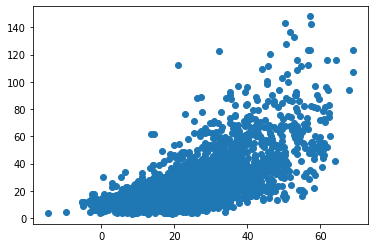

In [55]:
plt.scatter(reg.predict(X_test),y_test);

In [56]:
# create dataframe with predicted and real values from the test set
results = pd.DataFrame(data=reg.predict(X_test), columns=['prediction'])
results['real'] = y_test.values
results['difference']=results['real']-results['prediction']

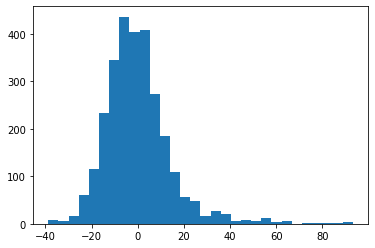

In [57]:
# distribution of the differences
plt.hist(results['difference'],bins=30);

In [58]:
# divide data on pollution levels
def pol_levels(x):
    if x <= 12:
        return 0 # healthy
    elif x > 12 and x <=35.4:
        return 1 # moderate
    elif x > 35.4 and x <=55.4:
        return 2 # unhealthy for sensitive groups
    elif x > 55.4 and x <=150.4:
        return 3 # unhealthy
    else:
        return 4 # hazardous
    
results['pred_lev'] = results['prediction'].apply(pol_levels)
results['real_lev'] = results['real'].apply(pol_levels)
results['diff_lev']=results['real_lev']-results['pred_lev']

In [59]:
results['diff_lev'].value_counts()

 0    1570
-1     702
 1     491
 2      40
-2      11
Name: diff_lev, dtype: int64

In [60]:
# percent of correctly predicted pollution levels
results[results['diff_lev'] == 0].shape[0]/results.shape[0]

0.5579246624022743

In [61]:
results.head()

,prediction,real,difference,pred_lev,real_lev,diff_lev
0,26.121563,17.1,-9.021563,1,1,0
1,19.972525,46.3,26.327475,1,2,1
2,20.827447,9.2,-11.627447,1,0,-1
3,13.263303,14.6,1.336697,1,1,0
4,7.647055,9.6,1.952945,0,0,0


In [62]:
results.describe()

,prediction,real,difference,pred_lev,real_lev,diff_lev
count,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,24.584007,24.612544,0.028538,1.056503,1.002132,-0.054371
std,13.120425,19.463815,14.352009,0.653688,0.839393,0.702613
min,-14.531313,3.100000,-38.736443,0.000000,0.000000,-2.000000
25%,15.232954,11.600000,-8.866730,1.000000,0.000000,-1.000000
50%,22.822407,18.500000,-1.674582,1.000000,1.000000,0.000000
75%,32.370036,31.000000,6.548824,1.000000,1.000000,0.000000
max,68.879459,148.100000,93.072238,3.000000,3.000000,2.000000


In [63]:
# convert dates to datetime format
df_drop_col['time'] = pd.to_datetime(df_drop_col['time'],format = '%Y-%m-%d %H:%M:%S')

# create new feature month
df_drop_col['month'] = df_drop_col['time'].apply(lambda time: time.month)

# create new feature hour
df_drop_col['hour'] = df_drop_col['time'].apply(lambda time: time.hour)

# create new feature weekday
df_drop_col['weekday'] = df_drop_col['time'].apply(lambda time: time.weekday())

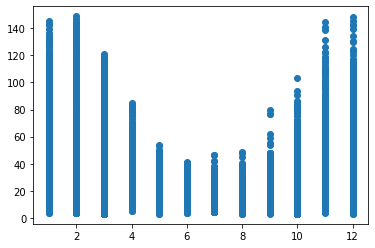

In [64]:
plt.scatter(df_drop_col['month'],df_drop_col['PM2']);

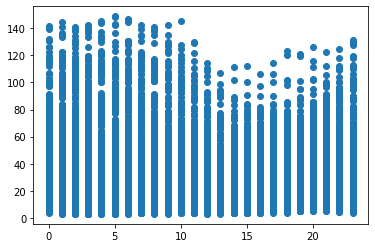

In [65]:
plt.scatter(df_drop_col['hour'],df_drop_col['PM2']);

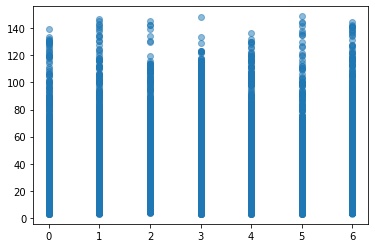

In [66]:
plt.scatter(df_drop_col['weekday'],df_drop_col['PM2'],alpha = 0.5);

In [67]:
# create checkpoint
df_time = df_drop_col.copy()

In [68]:
df_time['month'] = df_time['month'].apply(month_map)
df_time['hour'] = df_time['hour'].apply(hour_map)
df_time['weekday'] = df_time['weekday'].apply(weekday_map)

In [69]:
df_time.head()

,time,temperature,humidity,windSpeed,visibility,ozone,east_wind,south_wind,west_wind,PM2,month,hour,weekday
0,2019-01-01 23:00:00,3.20,0.80,9.3,10.003,314.2,0,0,1,12.9,winter,evening,workday
1,2019-01-02 00:00:00,2.20,0.85,8.8,10.003,315.5,0,0,1,5.5,winter,night,workday
2,2019-01-02 01:00:00,2.20,0.79,7.2,10.003,315.7,0,0,1,4.7,winter,night,workday
3,2019-01-02 02:00:00,1.20,0.92,7.2,2.003,316.5,0,0,1,5.7,winter,night,workday
4,2019-01-02 03:00:00,0.22,0.99,7.2,1.498,318.5,0,0,1,6.1,winter,night,workday


In [70]:
# create checkpoint
df_time_dummies = df_time.copy()

season_columns = pd.get_dummies(df_time_dummies['month'], drop_first = True)
daypart_columns = pd.get_dummies(df_time_dummies['hour'], drop_first = True)
weekend_columns = pd.get_dummies(df_time_dummies['weekday'], drop_first = True)

# concatenate column values
# create checkpoint
df_dummies = pd.concat([df_time_dummies,season_columns,daypart_columns,weekend_columns], axis = 1)

In [71]:
df_dummies.head()

,time,temperature,humidity,windSpeed,visibility,ozone,east_wind,south_wind,west_wind,PM2,month,hour,weekday,spring,summer,winter,evening,morning,night,workday
0,2019-01-01 23:00:00,3.20,0.80,9.3,10.003,314.2,0,0,1,12.9,winter,evening,workday,0,0,1,1,0,0,1
1,2019-01-02 00:00:00,2.20,0.85,8.8,10.003,315.5,0,0,1,5.5,winter,night,workday,0,0,1,0,0,1,1
2,2019-01-02 01:00:00,2.20,0.79,7.2,10.003,315.7,0,0,1,4.7,winter,night,workday,0,0,1,0,0,1,1
3,2019-01-02 02:00:00,1.20,0.92,7.2,2.003,316.5,0,0,1,5.7,winter,night,workday,0,0,1,0,0,1,1
4,2019-01-02 03:00:00,0.22,0.99,7.2,1.498,318.5,0,0,1,6.1,winter,night,workday,0,0,1,0,0,1,1


In [72]:
# drop time, month, hour, weekday columns
# checkpoint
df_prep = df_dummies.drop(['time','month','hour','weekday'], axis = 1)

df_prep.columns.values

array(['temperature', 'humidity', 'windSpeed', 'visibility', 'ozone',
       'east_wind', 'south_wind', 'west_wind', 'PM2', 'spring', 'summer',
       'winter', 'evening', 'morning', 'night', 'workday'], dtype=object)

In [73]:
df_prep = df_prep[['temperature', 'humidity', 'windSpeed', 'visibility', 'ozone',
       'east_wind', 'south_wind', 'west_wind', 'spring', 'summer',
       'winter', 'evening', 'morning', 'night', 'workday', 'PM2']]

In [74]:
df_prep = df_prep.dropna().reset_index()
df_prep.drop(['index'],axis=1,inplace = True)

In [75]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16694 entries, 0 to 16693
Data columns (total 16 columns):
temperature    16694 non-null float64
humidity       16694 non-null float64
windSpeed      16694 non-null float64
visibility     16694 non-null float64
ozone          16694 non-null float64
east_wind      16694 non-null int64
south_wind     16694 non-null int64
west_wind      16694 non-null int64
spring         16694 non-null uint8
summer         16694 non-null uint8
winter         16694 non-null uint8
evening        16694 non-null uint8
morning        16694 non-null uint8
night          16694 non-null uint8
workday        16694 non-null uint8
PM2            16694 non-null float64
dtypes: float64(6), int64(3), uint8(7)
memory usage: 1.3 MB


In [76]:
unscaled_inputs = df_prep.iloc[:,:-1]

In [77]:
unscaled_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16694 entries, 0 to 16693
Data columns (total 15 columns):
temperature    16694 non-null float64
humidity       16694 non-null float64
windSpeed      16694 non-null float64
visibility     16694 non-null float64
ozone          16694 non-null float64
east_wind      16694 non-null int64
south_wind     16694 non-null int64
west_wind      16694 non-null int64
spring         16694 non-null uint8
summer         16694 non-null uint8
winter         16694 non-null uint8
evening        16694 non-null uint8
morning        16694 non-null uint8
night          16694 non-null uint8
workday        16694 non-null uint8
dtypes: float64(5), int64(3), uint8(7)
memory usage: 1.1 MB


In [78]:
columns_to_omit = ['east_wind', 'south_wind', 'west_wind', 'spring', 'summer', 'winter', 'evening', 'morning', 'night',
       'workday']

columns_to_scale = [column for column in unscaled_inputs.columns.values if column not in columns_to_omit]
#columns_to_scale = ['temperature', 'windSpeed', 'ozone', 'month', 'hour']
columns_to_scale

['temperature', 'humidity', 'windSpeed', 'visibility', 'ozone']

In [79]:
smog_scaler = CustomScaler(columns_to_scale)

smog_scaler.fit(unscaled_inputs)

scaled_inputs = smog_scaler.transform(unscaled_inputs)

scaled_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16694 entries, 0 to 16693
Data columns (total 15 columns):
temperature    16694 non-null float64
humidity       16694 non-null float64
windSpeed      16694 non-null float64
visibility     16694 non-null float64
ozone          16694 non-null float64
east_wind      16694 non-null int64
south_wind     16694 non-null int64
west_wind      16694 non-null int64
spring         16694 non-null uint8
summer         16694 non-null uint8
winter         16694 non-null uint8
evening        16694 non-null uint8
morning        16694 non-null uint8
night          16694 non-null uint8
workday        16694 non-null uint8
dtypes: float64(5), int64(3), uint8(7)
memory usage: 1.1 MB


In [80]:
scaled_inputs.head()

,temperature,humidity,windSpeed,visibility,ozone,east_wind,south_wind,west_wind,spring,summer,winter,evening,morning,night,workday
0,-0.887997,0.371593,3.390425,-1.268489,-0.183808,0,0,1,0,0,1,1,0,0,1
1,-1.005286,0.659209,3.121664,-1.268489,-0.153150,0,0,1,0,0,1,0,0,1,1
2,-1.005286,0.314069,2.261630,-1.268489,-0.148433,0,0,1,0,0,1,0,0,1,1
3,-1.122576,1.061872,2.261630,-3.572512,-0.129566,0,0,1,0,0,1,0,0,1,1
4,-1.237520,1.464535,2.261630,-3.717953,-0.082399,0,0,1,0,0,1,0,0,1,1


In [81]:
targets = df_prep['PM2']

In [82]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=101)

print(X_train.shape, y_train.shape)

(13355, 15) (13355,)


In [83]:
# Linear regression with sklearn

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,y_train)

reg.score(X_train,y_train)

0.429441658310762

In [84]:
# create summary table with all coefficients and intercept
feature_name = unscaled_inputs.columns.values

summary_table = pd.DataFrame(columns = ['Feature name'],data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,temperature,-9.633167
1,humidity,-1.923484
2,windSpeed,-7.324406
3,visibility,-3.607964
4,ozone,-3.980264
5,east_wind,7.847451
6,south_wind,6.805115
7,west_wind,6.768344
8,spring,4.256062
9,summer,3.052071


In [85]:
summary_table.index = summary_table.index + 1 

summary_table.loc[0] = ['Intercept',reg.intercept_]

summary_table = summary_table.sort_index()

summary_table

,Feature name,Coefficient
0,Intercept,11.792468
1,temperature,-9.633167
2,humidity,-1.923484
3,windSpeed,-7.324406
4,visibility,-3.607964
5,ozone,-3.980264
6,east_wind,7.847451
7,south_wind,6.805115
8,west_wind,6.768344
9,spring,4.256062


In [86]:
# model score on test data
reg.score(X_test,y_test)

0.4304926178859221

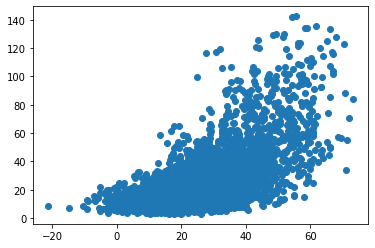

In [87]:
plt.scatter(reg.predict(X_test),y_test);

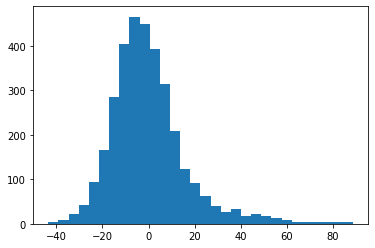

In [88]:
# create dataframe with predicted and real values from the test set
results = pd.DataFrame(data=reg.predict(X_test), columns=['prediction'])
results['real'] = y_test.values
results['difference']=results['real']-results['prediction']

# distribution of the differences
plt.hist(results['difference'],bins=30);

In [89]:
results['pred_lev'] = results['prediction'].apply(pol_levels)
results['real_lev'] = results['real'].apply(pol_levels)
results['diff_lev']=results['real_lev']-results['pred_lev']

In [90]:
results['diff_lev'].value_counts()

 0    1791
-1     862
 1     599
 2      51
-2      36
Name: diff_lev, dtype: int64

In [91]:
# percent of correctly predicted pollution levels
results[results['diff_lev'] == 0].shape[0]/results.shape[0]

0.5363881401617251

In [92]:
results.head()

,prediction,real,difference,pred_lev,real_lev,diff_lev
0,34.503450,14.4,-20.103450,1,1,0
1,15.451534,16.7,1.248466,1,1,0
2,43.925736,125.8,81.874264,2,3,1
3,30.477022,10.5,-19.977022,1,0,-1
4,32.816036,22.1,-10.716036,1,1,0


In [93]:
results.describe()

,prediction,real,difference,pred_lev,real_lev,diff_lev
count,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000
mean,26.651815,26.660677,0.008862,1.153639,1.083857,-0.069781
std,14.170086,21.851714,16.490550,0.699692,0.867584,0.732851
min,-21.249296,3.000000,-43.503993,0.000000,0.000000,-2.000000
25%,16.677911,12.300000,-10.276997,1.000000,1.000000,-1.000000
50%,25.139010,19.400000,-2.090505,1.000000,1.000000,0.000000
75%,35.884873,33.300000,7.120949,2.000000,1.000000,0.000000
max,73.226425,142.400000,88.499126,3.000000,3.000000,2.000000
